<a href="https://colab.research.google.com/github/Artorius81/labs_ml_basov/blob/main/ml_ex_07_12_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl xlrd

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/data.xlsx')
df

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,2017-11-01,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4963,4964,WSR/1.-1751/2017,2017-11-01,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4964,4965,WSR/1.-1748/2017,2017-11-01,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4965,4966,WSR/1.-1747/2017,2017-11-01,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


**1.1 Предобработка данных и выделение значимых атрибутов**

In [3]:
df.head(15)

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
5,6,WSR/1-831/2019,2019-04-09,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...,NaN
6,7,WSR/1-830/2019,2019-04-09,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци...",NaN
7,8,WSR/1.6-832/2019,2019-04-09,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...,NaN
8,9,WSR/1-836/2019,2019-04-09,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019,NaN
9,10,WSR/1-829/2019,2019-04-08,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...,NaN


In [4]:
# Здесь мы избавляемся от не нужных для нашей задачи столбцов
df = df.drop(['№ п/п', 'Дата\nрегистрации', 'Исх. №\nДата', '№\nдокумента', 'Примечание'], axis=1)
df

,Адресат,Автор,Краткое\nсодержание
0,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...
4962,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...
4965,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


In [5]:
# Смотрим на null
df.isnull().sum()

Адресат                0
Автор                  0
Краткое\nсодержание    0
dtype: int64

**Примечание**

Были удалены столбцы '№ п/п', 'Дата\nрегистрации', 'Исх. №\nДата', '№\nдокумента'. Для поставленной задачи они не несут никакой информационной/смысловой нагрузки.

Также столбец 'Примечание' содержит мало записей и также несет мало смысловой нагрузки для нашей задачи. Удаляем.

**1.2 Разбиение сложных атрибутов**

In [6]:
# Импортируем библиотеку для регулярных выражени
import re

In [7]:
# Работаем с "Автор"
df['ФИО'] = df['Автор'].apply(lambda x: re.search(r'^[^()]+', x).group(0))
df['Организация'] = df['Автор'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1))
df = df.drop(columns=['Автор'])
df

,Адресат,Краткое\nсодержание,ФИО,Организация
0,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»
1,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации
2,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области
3,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации
4,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...
...,...,...,...,...
4962,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,Медведев Д.А.,Аппарат Правительства Российской Федерации
4963,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...
4964,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...
4965,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...


In [8]:
# Работаем с "Адресат"
def process_address(column_value):
    names = re.findall(r'[А-ЯЁ][а-яё]+ [А-ЯЁ]\.[А-ЯЁ]\.', column_value)
    return names[0] if names else column_value

df['Адресат'] = df['Адресат'].apply(process_address)
df

,Адресат,Краткое\nсодержание,ФИО,Организация
0,Уразов Р.Н.,Вх - О возможности использования сетевого изда...,Антонова С.В.,АО «Интерфакс»
1,Уразов Р.Н.,Вх - Об участии в совещании по вопросу доработ...,Картошкин С.А.,Министерство просвещения Российской Федерации
2,Уразов Р.Н.,Вх - О командировании Саликовой К. и Глушко Д....,Цивилев С.Е.,Администрация Кемеровской области
3,Иванюк Л.А.,Вх - Об участии в Чемпионате мира по профессио...,Волков Г.А.,Министерство транспорта Российской Федерации
4,Уразов Р.Н.,Вх - Об участии в церемонии открытия Вузовског...,Атанов И.В.,Ставропольский государственный аграрный универ...
...,...,...,...,...
4962,Уразов Р.Н.,Протокол заседания Президиума Совета при Прези...,Медведев Д.А.,Аппарат Правительства Российской Федерации
4963,Уразов Р.Н.,О проведении 21.11.2017 заседания организацион...,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...
4964,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...
4965,Уразов Р.Н.,Протокол заседания рабочей группы приоритетног...,Огородова Л.М.,Министерство образования и науки Российской Фе...


**Примечание**

С помощью регулярных выражений столбец "Автор" был разбит на два ("ФИО" и "Организация"). Также в "Адресат" в некоторых строках встречается списко ФИО для отправки. Для удобства сделали, чтобы в таких строках записывало только первый элемент списка.

**1.3 Дополнение недостающими данными**



**Примечание**

По заданию:

*Такая же ситуация с адресатом, система, определяющая направление документа по фамилии будет являться частным случаем решения, и в случае кадровых перестановок не сможет функционировать.*

Алгоритм решения:



1.   Создаем словарь с названиями тех организация, из которых письма идут сразу к Генеральному Директору (смотрим Алгоритм.pdf). Также смотрим по вопросам исполнения.
2.   



**1.4 Визуализация зависимостей данных**

In [ ]:
!pip install nltk wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


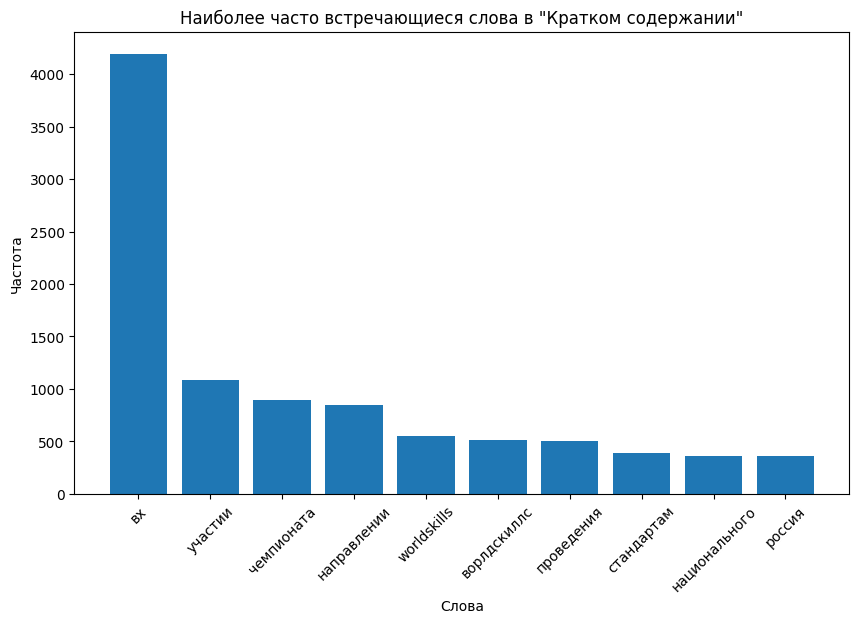

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

text = ' '.join(df['Краткое\nсодержание'])
tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stopwords.words('russian')]
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words))
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Наиболее часто встречающиеся слова в "Кратком содержании"')
plt.xticks(rotation=45)
plt.show()

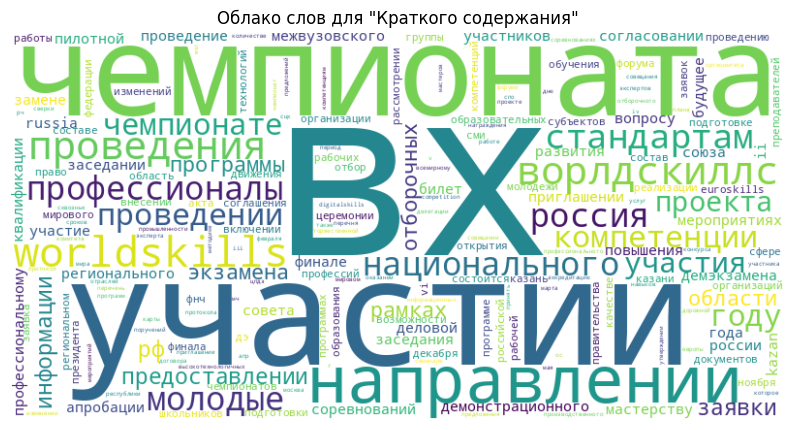

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для "Краткого содержания"')
plt.show()

111

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    df['Краткое\nсодержание'], df['Адресат'], test_size=0.2, random_state=42
)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Точность: {accuracy}")
print("Матрица ошибок:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5774647887323944
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                   precision    recall  f1-score   support

    Абдуллин А.М.       0.00      0.00      0.00         1
      Алимов А.А.       0.00      0.00      0.00         2
     Антонов Ю.В.       0.00      0.00      0.00         2
       Базер О.Э.       0.00      0.00      0.00         1
    Бурганов Р.Т.       0.00      0.00      0.00         1
     Гафуров И.Р.       0.00      0.00      0.00         1
      Глушко Д.Е.       0.53      0.91      0.67       328
     Гонтарь М.А.       0.00      0.00      0.00        18
    Дмитриев М.Г.       0.00      0.00      0.00         1
     Домаева О.Ю.       0.00      0.00      0.00         1
   Досканова А.В.       0.00      0.00      0.00         6
      Дрокин В.И.       0.00      0.00      0.00         1
    Дубицкая Ю.А.       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


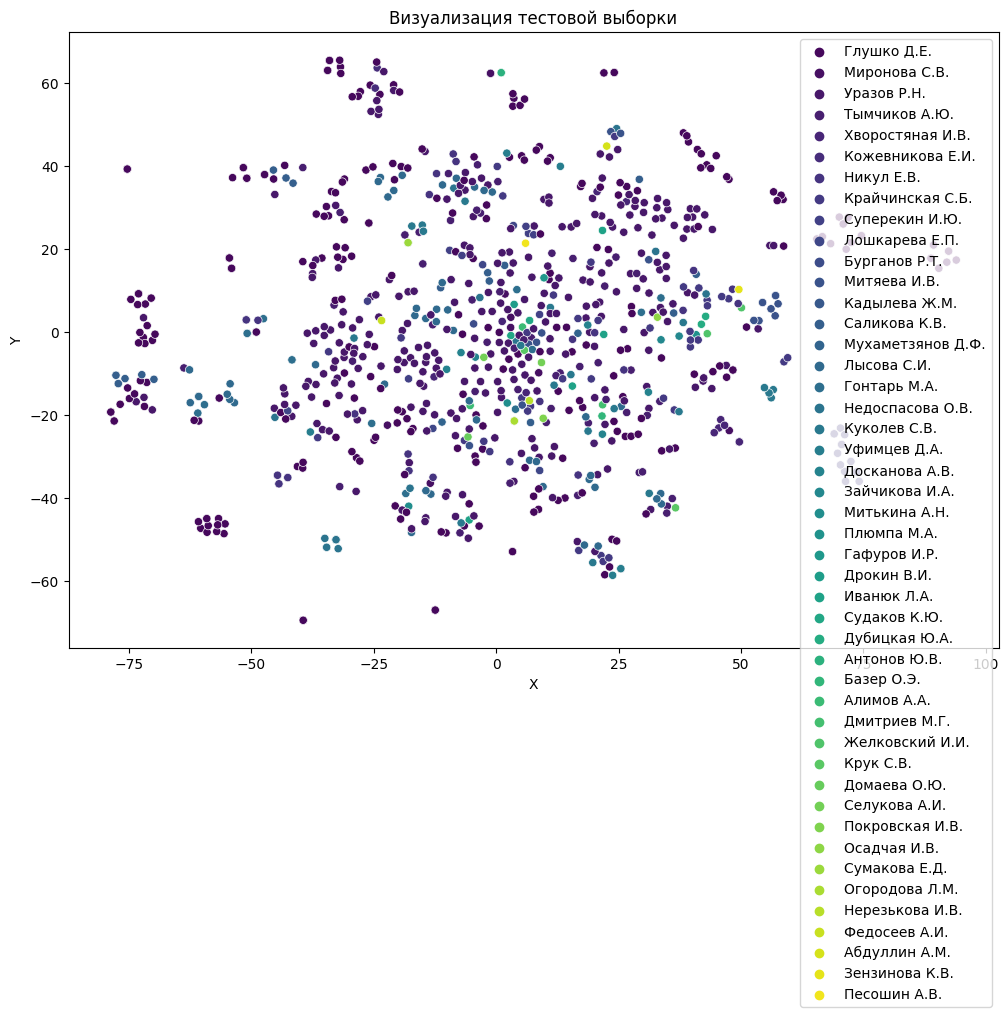

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_train_pca = PCA(n_components=50).fit_transform(X_train_tfidf.toarray())
X_test_pca = PCA(n_components=50).fit_transform(X_test_tfidf.toarray())

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)
X_test_tsne = tsne.fit_transform(X_test_pca)

df_visualization_train = pd.DataFrame({
    'X': X_train_tsne[:, 0],
    'Y': X_train_tsne[:, 1],
    'Адресат': y_train
})

df_visualization_test = pd.DataFrame({
    'X': X_test_tsne[:, 0],
    'Y': X_test_tsne[:, 1],
    'Адресат': y_test
})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Адресат', data=df_visualization_test, palette='viridis', markers=True)
plt.title('Визуализация тестовой выборки')
plt.legend(loc='upper right')
plt.show()


111